# <p style="padding:10px;background-color:#90EE90;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:500">Мониторинг атмосферы в Сеуле</p>

## О проекте

### Описание проекта


Задание выполнил ![TG profile](https://img.shields.io/badge/seikin__alexey-blue?logo=telegram&logoColor=yellow)

Задание включает анализ данных из двух таблиц: 
* AerialEcoData_Seoul.csv
* Station_coordinates.csv

Данные имеют весьма косвенное отношение к биологии, тем не менее они весьма интересны в аспекте построения классификационных моделей.

На территории Сеула есть несколько станций наблюдения за экологической обстановкой. В течение 2017-го года на каждой станции выполнялся мониторинг состояния атмосферного воздуха – оценивалась степень загрязнения вредными примесями. 

### Описание данных
В таблице AerialEcoData_Seoul.csv представлены суточные медианные значения показателей загрязнения атмосферы. 

В таблицу Station_coordinates.csv сведены географические координаты станций наблюдения, а также указано в каких районах Сеула они расположены. 

### Признаки
  - $SO_2$ — диоксид серы. Главным источником диоксида серы является сжигание ископаемого топлива, такого как уголь, нефть и газ. SO2 может приводить к образованию кислотных дождей, когда соединяется с водными каплями в атмосфере. 
  - $NO_2$ -  диоксид азота. Главным источником диоксида азота является сжигание ископаемого топлива, особенно в автотранспорте и энергетических установках. Является важным компонентом смога и агрессивного дождя. Он может способствовать образованию озона на низких уровнях атмосферы. NO2 также может привести к кислотификации почв и водных ресурсов
  - $NO_2$ — озон.  Озон образуется в атмосфере в результате химических реакций между азотными оксидами (NOx), углеводородами и солнечным светом. На низких уровнях атмосферы озон является загрязнителем и может иметь негативное воздействие на растения.
  - $CO$ — угарный газ. Результат неполного сгорания органики. Метаболический яд. Является главным источником антропогенного выброса углерода в атмосферу. Он также является одним из главных вкладчиков в формирование парникового эффекта и изменение климата
  - $PM2.5$ - частицы, взвешенные в воздухе, которые имеют диаметр меньше 2.5 микрометра, могут взвешиваться в воздухе в течение длительного времени. PM2.5 может включать в себя такие вещества, как пыль, сажу, летучие органические соединения и химические вещества. 
  - $PM10$ - частицы, взвешенные в воздухе, которые имеют диаметр меньше 10 микрометров, могут взвешиваться в воздухе в течение длительного времени. Содержат в т.ч. пыльцу, сажу, споры грибов

В таблице AerialEcoData_Seoul.csv представлены суточные медианные значения показателей загрязнения атмосферы. 


## План работы

- [x]  Шаг 1: Подготовка данных
    - [x]  Загрузка данных
    - [x]  Предобработка датасетов
    - [x]  Расширение признакового пространства


- [X]  Шаг 2: Исследовательский анализ данных
    - [x]  Карта района
    - [x]  Пропуски и явные дубликаты
    - [x]  Выбросы
    - [x]  Предобработка данных
    - [x]  Мультиколлинеарность
    - [x]  Баланс классов таргета

  
- [ ]  Шаг 3: Построение базовой модели для задачи классификации
    - [x]  Проверка модели на адекватность
    - [x]  Построение базовой модели классификации

- [ ]  Шаг 4: Перебор моделей с подбором гиперпараметров
    - [x] Описание гиперпараметров и алгоритма
- [ ]  Шаг 5: Тест лучшей модели
    - [x]  Проведение тестирования
- [ ]  Шаг 6: Метамоделирование
    - [x]  Построение метамодели
- [ ]  Шаг 7: Проверка гипотезы о связи расстояния между районами и уровнем загрязнений
    - [x]  Расчет статистической значимости результатов
- [ ]  Шаг 8: Проверка гипотезы о временах года
    - [x]
- [ ]  Шаг 9: Общий вывод
    - [x]

## Импорты

In [111]:
# install folium if not
try:
    import folium
    print('folium ver.:', folium.__version__)
except:
    !pip install folium

folium ver.: 0.15.0


In [112]:
# install ydata_profiling if not
try:
    import ydata_profiling
    print('ydata_profiling ver.:', ydata_profiling.__version__)
except:
    !pip install ydata_profiling

ydata_profiling ver.: v4.1.0


In [113]:
# install catboost if not
try:
    import catboost
    print('catboost ver.:', catboost.__version__)
except:
    !pip install catboost

catboost ver.: 1.0.3


In [114]:
# install geopy if not
try:
    import geopy
    print('geopy ver.:', geopy.__version__)
except:
    !pip install geopy

geopy ver.: 2.4.1


In [115]:
# Стандартные библиотеки
import json
import warnings

# Сторонние библиотеки
import folium
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from folium.plugins import HeatMap, MarkerCluster
from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    StackingClassifier
)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
    roc_auc_score,
    make_scorer
)
from sklearn.model_selection import (
    RandomizedSearchCV,
    train_test_split
)

from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    LabelEncoder,
    MinMaxScaler,
    OneHotEncoder,
    PolynomialFeatures,
    StandardScaler
)
from sklearn.model_selection import cross_val_score, cross_val_predict

from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import shuffle
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

# Локальные библиотеки/зависимости приложения
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
import xgboost as xgb
from category_encoders.target_encoder import TargetEncoder

from scipy.stats import pearsonr
import pandas as pd
from scipy.spatial import distance
from geopy.distance import geodesic

# Установка фиксированного состояния случайности для воспроизводимости
RANDOM_STATE = 42

# Подавление предупреждений
warnings.filterwarnings('ignore')

# Установка порога корреляции
CORR_TRH = 0.7
ALPHA = 0.05

## Шаг 1: Подготовка данных

In [116]:
def load_dataset(local_path, remote_path):
    try:
        return pd.read_csv(local_path)
    except FileNotFoundError:
        return pd.read_csv(remote_path)

# Define the paths
local_measures_path = 'datasets/AerialEcoData_Seoul.csv'
remote_measures_path = 'https://raw.githubusercontent.com/immelstorun/cspfmba.ru_tw/main/datasets/AerialEcoData_Seoul.csv'

local_stations_path = 'datasets/Station_coordinates.csv'
remote_stations_path = 'https://raw.githubusercontent.com/immelstorun/cspfmba.ru_tw/main/datasets/Station_coordinates.csv'

# Load the datasets
measures = load_dataset(local_measures_path, remote_measures_path)
stations = load_dataset(local_stations_path, remote_stations_path)

In [117]:
# import requests
# import json
# Загрузка GeoJSON с административными границамим Сеула
def load_json(local_path, remote_url):
    try:
        with open(local_path, 'r') as file:
            return json.load(file)
    except FileNotFoundError:
        response = requests.get(remote_url)
        response.raise_for_status()  # This will raise an HTTPError if the request returned an unsuccessful status code
        return response.json()

# Define the paths
local_json_path = 'json/seoul_municipalities.json'
remote_json_url = 'https://raw.githubusercontent.com/immelstorun/cspfmba.ru_tw/main/json/seoul_municipalities.json'

# Load the GeoJSON data
district_borders = load_json(local_json_path, remote_json_url)

In [118]:
# Основной датасет с наблюдениями
measures.head(3)

,Measurement_date,Station_code,SO2,NO2,O3,CO,PM2_5,PM10
0,2017-01-01,101,0.004,0.056,0.002,1.0,69.0,85.0
1,2017-01-01,104,0.006,0.042,0.007,0.7,45.0,70.0
2,2017-01-01,106,0.005,0.055,0.003,1.1,67.5,78.0


In [119]:
# Вспомогательный датасет с локациями станций мониторинга
stations.head(3)

,Address,Station code,Latitude,Longitude
0,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",101,37.572016,127.005008
1,"15, Deoksugung-gil, Jung-gu, Seoul, Republic o...",102,37.564263,126.974676
2,"136, Hannam-daero, Yongsan-gu, Seoul, Republic...",103,37.540033,127.004850


In [120]:
# Объединение датасетов по коду станции
stations.rename(columns={'Station code': 'Station_code'}, inplace=True) #Приведение имен к одному виду
merged_df = measures.merge(stations, on='Station_code', how='inner') # Сборка датасета методом inner join
# check
merged_df.sort_values(by='Measurement_date').head(3)

,Measurement_date,Station_code,SO2,NO2,O3,CO,PM2_5,PM10,Address,Latitude,Longitude
0,2017-01-01,101,0.004,0.056,0.002,1.0,69.0,85.0,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008
1095,2017-01-01,112,0.005,0.044,0.002,0.9,69.0,82.0,"49, Samyang-ro 139-gil, Gangbuk-gu, Seoul, Rep...",37.647930,127.011952
365,2017-01-01,104,0.006,0.042,0.007,0.7,45.0,70.0,"215, Jinheung-ro, Eunpyeong-gu, Seoul, Republi...",37.609823,126.934848


In [121]:
# Извлечение названия района из поля адреса
def adress_spitter(df):

    country = []
    city = []
    district = []
    streetAddress = []
    
    for line in df['Address']:

        row = []
        for val in line.split(','):
            row += [val.strip()]

        country += [row[4]]
        city += [row[3]]
        district += [row[2]]
        streetAddress += [row[0] + ' ' + row[1]]

    df['Country'] = country
    df['City'] = city
    df['District'] = district
    df['Street_Address'] = streetAddress

    # Удаление исходного поля с адресом
    df.drop(['Address'], axis=1, inplace=True)

    # Перераспределение полей
    df = df[['Measurement_date', 'Station_code',
                       'Country', 'City', 'Street_Address', 'Latitude',
                       'Longitude', 'SO2', 'NO2', 'O3', 'CO', 'PM10', 'PM2_5', 'District']]
    
    # Приведение имен полей к нижнему регистру
    df = df.rename(columns=str.lower)
    
    # to snake_case
    # df.columns = [re.sub(r'(?<=!^)(?=[A-Z])', '_', i).lower() for i in df.columns]

    return df

splitted_df = adress_spitter(merged_df)
splitted_df.head(3)

,measurement_date,station_code,country,city,street_address,latitude,longitude,so2,no2,o3,co,pm10,pm2_5,district
0,2017-01-01,101,Republic of Korea,Seoul,19 Jong-ro 35ga-gil,37.572016,127.005008,0.004,0.0560,0.002,1.0,85.0,69.0,Jongno-gu
1,2017-01-02,101,Republic of Korea,Seoul,19 Jong-ro 35ga-gil,37.572016,127.005008,0.005,0.0475,0.013,1.0,92.5,76.5,Jongno-gu
2,2017-01-03,101,Republic of Korea,Seoul,19 Jong-ro 35ga-gil,37.572016,127.005008,0.005,0.0520,0.012,0.8,75.0,53.0,Jongno-gu


In [122]:
# Приведение типа данных поля с датой к типу datetime
splitted_df['measurement_date'] = pd.to_datetime(splitted_df['measurement_date'])

In [123]:
# Удаление теперь лишних столбцов
df = splitted_df.copy()
df = df.drop(columns=['country', 'city', 'street_address', 'latitude', 'longitude'])
# Перераспределение столбцов
df = df[['so2', 'no2', 'o3', 'co', 'pm10', 'pm2_5', 'district']]

In [124]:
# check
df.head(3)

,so2,no2,o3,co,pm10,pm2_5,district
0,0.004,0.0560,0.002,1.0,85.0,69.0,Jongno-gu
1,0.005,0.0475,0.013,1.0,92.5,76.5,Jongno-gu
2,0.005,0.0520,0.012,0.8,75.0,53.0,Jongno-gu


## Шаг 2: EDA

In [125]:
# Профайлер 
# ydata_profiling.ProfileReport(df)

In [126]:
# Определение функции сбора основных данных о датасетах
def df_info(df):
    len_df = len(df)
    count = 0
    na_col_name = []
    na_col_size = []
    unique_list = []
    for col in df.columns:
        notnull = df[col].notna().sum()
        if notnull < len_df:
            count+=1
        if df[col].isna().sum() > 0:
            na_col_name.append(col)
            col_size = df[col].isna().sum() / len(df) * 100
            na_col_size.append(col_size)
            
        unique_list.append(len(df[col].unique()))
    pivot = pd.DataFrame(data=unique_list, index=df.columns, columns=['Уникальные значения'])      

    print(f'Количество записей: \t {len_df}')
    print(f'Количество столбцов: \t {len(df.columns)}')
    print(f'Явных дубликатов: \t {df.duplicated().sum()}')
    print(f'Пропуски присутствуют в {count} столбцах из {len(df.columns)}:')
    display(df.isna().sum().sort_values(ascending=False))
    display(pd.DataFrame(na_col_size, index=na_col_name, columns=['Пропущено %']))
    print('Количество уникальных значений в признаках:')
    display(df.nunique().sort_values(ascending=False))
    print('\nСтатистика:')
    display(df.describe(include='all'))# статистика по данным всех типов
    print('\nОбобщенная информация:')
    display(df.info(verbose=False))
    print('\nПервые 3 строки:')
    display(df.head(3))

In [127]:
df_info(df)

Количество записей: 	 2190
Количество столбцов: 	 7
Явных дубликатов: 	 12
Пропуски присутствуют в 0 столбцах из 7:


so2         0
no2         0
o3          0
co          0
pm10        0
pm2_5       0
district    0
dtype: int64

,Пропущено %


Количество уникальных значений в признаках:


pm10        229
pm2_5       158
o3          143
no2         133
co           31
so2          24
district      6
dtype: int64


Статистика:


,so2,no2,o3,co,pm10,pm2_5,district
count,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190
unique,NaN,NaN,NaN,NaN,NaN,NaN,6
top,NaN,NaN,NaN,NaN,NaN,NaN,Jongno-gu
freq,NaN,NaN,NaN,NaN,NaN,NaN,365
mean,0.002430,0.024446,0.022786,0.504041,43.466667,23.228539,NaN
std,0.047992,0.050739,0.051051,0.216488,99.099759,14.653004,NaN
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,NaN
25%,0.003000,0.017000,0.014500,0.400000,25.000000,13.000000,NaN
50%,0.005000,0.024000,0.024000,0.500000,36.250000,20.000000,NaN
75%,0.006000,0.034000,0.034500,0.600000,51.500000,29.500000,NaN



Обобщенная информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Columns: 7 entries, so2 to district
dtypes: float64(6), object(1)
memory usage: 119.9+ KB


None


Первые 3 строки:


,so2,no2,o3,co,pm10,pm2_5,district
0,0.004,0.0560,0.002,1.0,85.0,69.0,Jongno-gu
1,0.005,0.0475,0.013,1.0,92.5,76.5,Jongno-gu
2,0.005,0.0520,0.012,0.8,75.0,53.0,Jongno-gu


Пропусков и явных дубликатов не обнаружено. обнаружены отрицательные значения размеров и концентраций.

In [128]:
def plot_feature_distributions(df):
    """
    Функция для отображения распределения действительных признаков с использованием boxplot и histogram.
    
    Параметры:
    df (pandas.DataFrame): Датафрейм, содержащий действительные признаки.
    num_features (list): Список имен действительных признаков для анализа.
    
    Возвращает:
    None: Функция только отображает графики.
    """
    
    num_features = df.select_dtypes(exclude=['object', 'datetime64']).columns.to_list()
    
    plt.figure(figsize=[10, 20])
    plt.subplots_adjust(top=0.94, wspace=0.5, hspace=1.5)
    plt.suptitle('Анализ распределения действительных признаков', fontsize=15)
    sns.set_style('darkgrid')
    subplot_height = len(num_features)
    subplot_width = 2
    position = 0
        
    for column_name in num_features:
        # Boxplot для признака
        position += 1
        plt.subplot(subplot_height, subplot_width, position)
        plt.title(f'BOXPLOT ({column_name})', fontsize=8)
        sns.boxplot(data=df[column_name], orient='h')
        plt.axvline(np.mean(df[column_name]), 
                    color='y', 
                    linestyle='-',
                    label='mean')
        plt.legend(title=f'СРЕДНЕЕ = {np.mean(df[column_name]):.2f}, МЕДИАНА = {np.median(df[column_name]):.2f}', 
                   loc='center', 
                   edgecolor = 'y',
                   facecolor = 'oldlace',
                   bbox_to_anchor=(0.5, -0.6))

        # Histogram для признака
        position += 1
        plt.subplot(subplot_height, subplot_width, position)
        plt.title(f'HISTOGRAM ({column_name})', fontsize=8)
        sns.histplot(df[column_name], color='b', kde=False, bins=50)

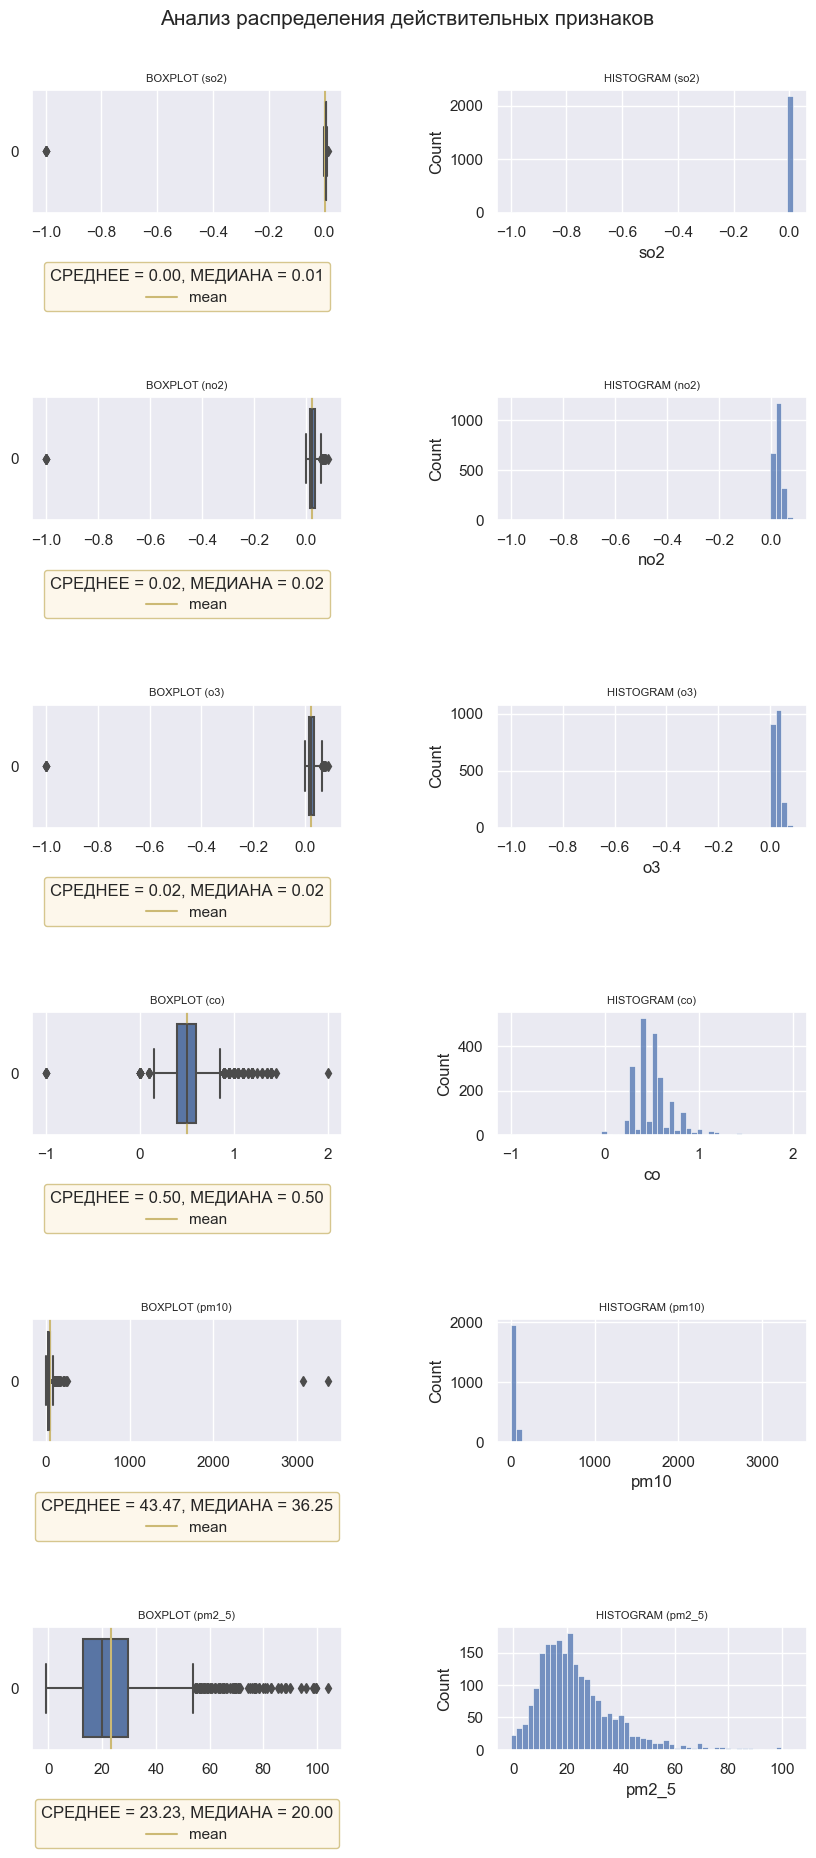

In [129]:
plot_feature_distributions(df)

### Предобработка данных

#### Борьба с выбросами

Выбросы есть в газах и частицах. Это хорошо видно по ящикам с усами и по гистограмма распределений значений. Выбросы нужно убирать по трем основным причинам - для повышения точности модели, предотвращения переобучения, сохранения стактистической надежности. Часто бороться с ними приходится вручную, но можно автоматизировать.

In [130]:
def get_borders(series):
    q1 = series.quantile(q=0.05)
    q3 = series.quantile(q=0.95)
    iqr = q3 - q1
    min_boundary = q1 - (1.5 * iqr)
    max_boundary = q3 + (1.5 * iqr)
    return min_boundary, max_boundary

def remove_outliers(df):
    num_features = df.select_dtypes(exclude=['object', 'datetime64']).columns.to_list()
    original_length = len(df)
    for column in num_features:
        min_border, max_border = get_borders(df[column])
        # Keep only the values that are within the min_border and max_border
        df = df[(df[column] >= min_border) & (df[column] <= max_border)]
    
    # Remove rows that have NaN values
    df = df.dropna().reset_index(drop=True)
    
    # Calculate changes in number of rows
    new_length = len(df)
    delta = original_length - new_length
    percent_change = (delta / original_length) * 100
    
    print(f'Original number of records: {original_length}')
    print(f'New number of records after removing outliers and NaNs: {new_length}')
    print(f'Absolute change in number of records: {delta}')
    print(f'Percentage change in number of records: {percent_change:.2f}%')
    
    return df


In [131]:
df = remove_outliers(df)

Original number of records: 2190
New number of records after removing outliers and NaNs: 2176
Absolute change in number of records: 14
Percentage change in number of records: 0.64%


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2176 entries, 0 to 2175
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   so2       2176 non-null   float64
 1   no2       2176 non-null   float64
 2   o3        2176 non-null   float64
 3   co        2176 non-null   float64
 4   pm10      2176 non-null   float64
 5   pm2_5     2176 non-null   float64
 6   district  2176 non-null   object 
dtypes: float64(6), object(1)
memory usage: 119.1+ KB


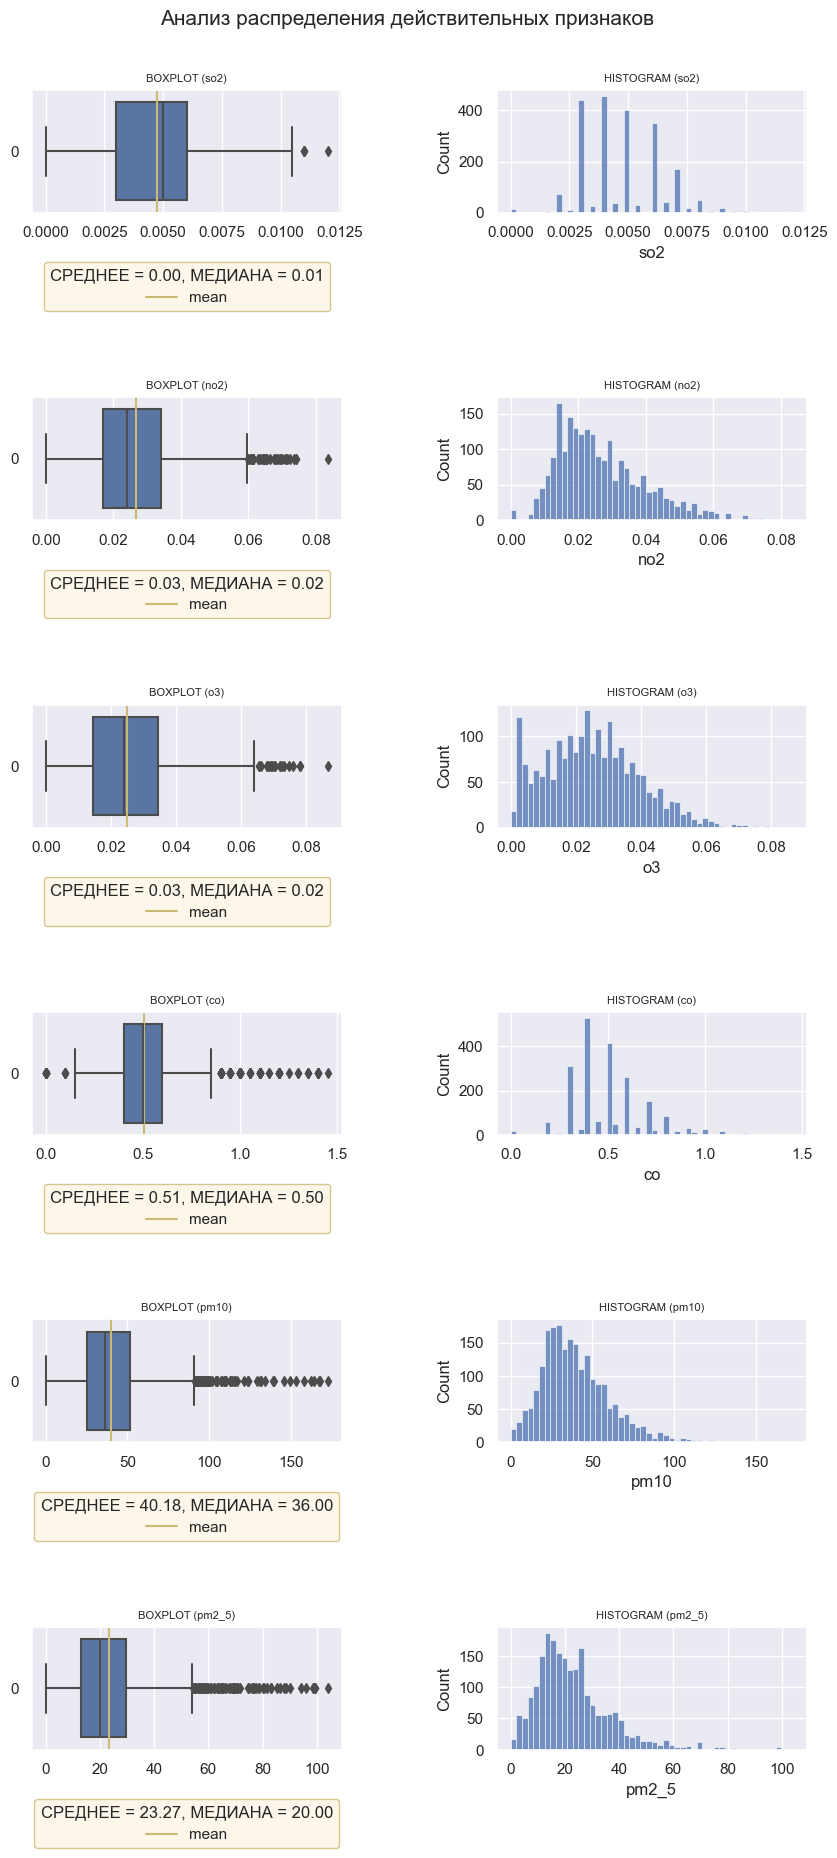

In [133]:
# Распределение значений признаков после удаления выбросов
plot_feature_distributions(df)

Вывод по разделу:
В данных обнаружены выбросы во всех действительных признаках. Их распределение и значения хорошо видны на гистограммах. Методов борьбы с выбросами несколько. В данном случаем применены:
* Фильтрация на основе статистических показателей: Использование межквартильного размаха (IQR), где данные за пределами 1.5 * IQR от первого и третьего квартилей считаются выбросами. Использованы квартили 0,05 / 0,95
* Так же использован метод ограничения данных: применение верхних и нижних порогов для данных вручную или исходя из доменных знаний. Принудительно удалены отрицательные значения концентраций и размеров, тк физически они не имеют смысла.


### Мультиколлинеарность

In [134]:
def plot_phik_matrix(df):
    """
    Функция для создания и визуализации квадратной матрицы корреляции phik.

    Аргументы:
    - df: pandas.DataFrame - исходный набор данных

    Возвращает:
    - None
    """
    # Создание квадратной матрицы корреляции
    phik_matrix = df.phik_matrix(verbose=False)

    # Создание маски скрытия по диагонали
    mask = np.triu(np.ones_like(phik_matrix, dtype=bool))

    # Вывод тепловой карты с названием
    plt.figure(figsize=(8, 5))
    sns.heatmap(phik_matrix, mask=mask, cmap='RdBu', annot=True, fmt=".2f")
    plt.title('Тепловая карта корреляции phik')  # Добавление названия
    plt.show()

    # Вычисление ранга полученной матрицы корреляции
    print(f'Ранг корр матрицы: {np.linalg.matrix_rank(phik_matrix)}')

    # Количество признаков
    print(f'Количество признаков: {df.shape[1]}')

    # Вычисление определителя матрицы корреляций с точностью до 4 х знаков
    print(f'Детерминант: {np.round(np.linalg.det(phik_matrix), 5)}')   


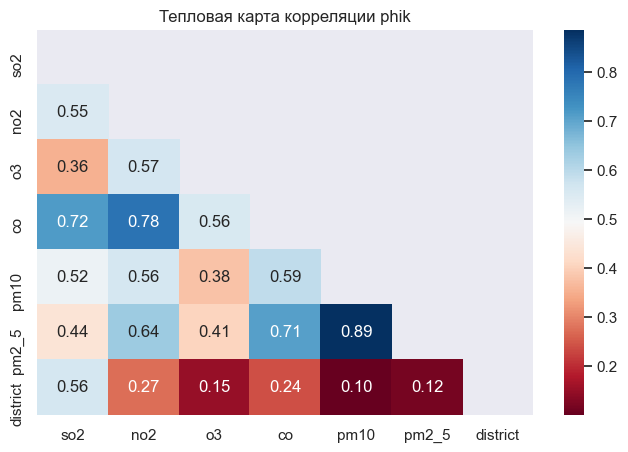

Ранг корр матрицы: 7
Количество признаков: 7
Детерминант: 0.0044


In [135]:
plot_phik_matrix(df)

In [136]:
def plot_pairplot(df):
    """
    Функция для отображения pairplot для признаков DataFrame.

    Аргументы:
    - df: pandas DataFrame, содержащий данные для построения pairplot

    Возвращает:
    - None
    """
    # pairplot для признаков
    data = df.copy()
    pairplot = sns.pairplot(data, hue='district')
    pairplot.fig.set_size_inches(8, 6)
    pairplot.fig.suptitle('Парная корреляция признаков по районам')

    # Маска
    mask = np.tri(pairplot.axes.shape[0], k=-1).T

    # Применение маски
    for i, j in zip(*mask.nonzero()):
        pairplot.axes[i, j].set_visible(False)

    plt.show()

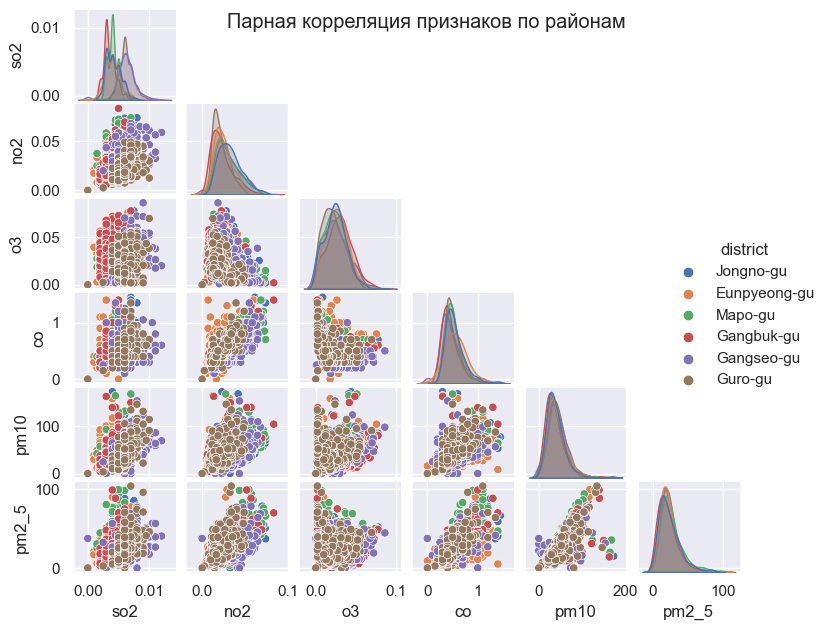

In [137]:
plot_pairplot(df)

In [138]:
# Топ признаков по корреляции с таргетом
print('Топ признаков по корреляции с таргетом:')
display(df.phik_matrix(verbose=False)['district'].sort_values(ascending=False)[1:])

Топ признаков по корреляции с таргетом:


so2      0.563362
no2      0.274205
co       0.241864
o3       0.150872
pm2_5    0.118132
pm10     0.101185
Name: district, dtype: float64

In [139]:
print('Топ признаков по корреляции друг к другу:')
phik_no_target = df.drop(columns=['district']).phik_matrix(verbose=False)
for col in phik_no_target.columns:
    phik_no_target[col][col] = 0
features_corr_top = phik_no_target.abs().max().sort_values(ascending=False)
display(features_corr_top)


Топ признаков по корреляции друг к другу:


pm10     0.887058
pm2_5    0.887058
no2      0.784513
co       0.784513
so2      0.716046
o3       0.567131
dtype: float64

### Удаление высококоррелированных признаков не производилось.

In [140]:
# high_corr_columns = ['pm2_5', 'co']
# print(f'Удаление коррелирющих > THR столбцов: {high_corr_columns}')
# df.drop(columns=high_corr_columns, inplace=True)

In [141]:
df

,so2,no2,o3,co,pm10,pm2_5,district
0,0.004,0.0560,0.0020,1.00,85.0,69.0,Jongno-gu
1,0.005,0.0475,0.0130,1.00,92.5,76.5,Jongno-gu
2,0.005,0.0520,0.0120,0.80,75.0,53.0,Jongno-gu
3,0.005,0.0610,0.0030,0.90,50.0,33.0,Jongno-gu
4,0.004,0.0420,0.0105,0.45,41.0,26.5,Jongno-gu
...,...,...,...,...,...,...,...
2171,0.006,0.0165,0.0100,0.40,29.0,17.0,Guro-gu
2172,0.006,0.0300,0.0030,0.70,52.0,28.5,Guro-gu
2173,0.009,0.0340,0.0020,0.80,104.0,71.0,Guro-gu
2174,0.007,0.0340,0.0020,1.10,134.0,104.0,Guro-gu


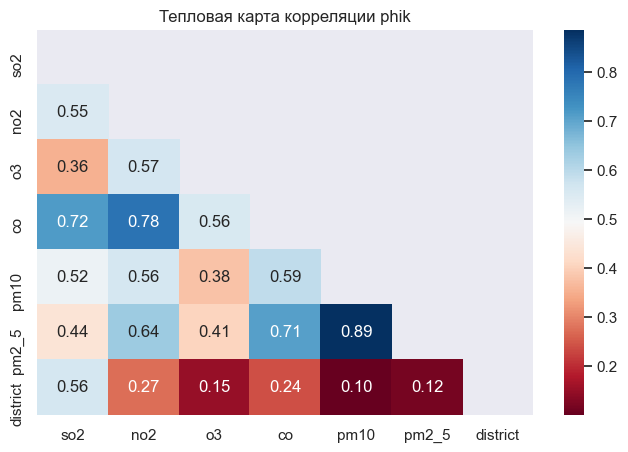

Ранг корр матрицы: 7
Количество признаков: 7
Детерминант: 0.0044


In [142]:
plot_phik_matrix(df)

In [143]:
# plot_pairplot(df)

Вывод по разделу:
Поскольку признаками являются как действительные так и категориальные признаки - применим метод phik,тк это статистический показатель, разработанный как расширение коэффициента корреляции Пирсона, но он предназначен для эффективной работы с категориальными, порядковыми и интервальными данными.

Если ранг матрицы соответствует количеству признаков, это означает, что все признаки являются линейно независимыми.
Формально линейной зависимости между факторами нет, и матрица факторов имеет максимальный ранг, но обнаружена мультиколлинеарность - матрица корреляции практически вырождена, несмотря на то что имеет максимальный ранг.

Обнаружены связи между признаками разной степени силы. К удалению выбраны признаки с силой связи между сильной и умеренной.

В нашем случае список признаков к удалению, где корреляция больше THR = 0.7: ['co', 'pm2_5'] 
После удаления столбцов были расчитаны матрица корреляции, ее детерминант (который стал чуть больше), а так-же визуализированы итоговые парные корреляции признаков.

## Шаг 3: Построение базовой модели для задачи классификации

In [144]:
# high_corr_columns = ['pm2_5', 'co']
# print(f'Удаление коррелирющих > THR столбцов: {high_corr_columns}')
# df.drop(columns=high_corr_columns, inplace=True)
df.head(3)

,so2,no2,o3,co,pm10,pm2_5,district
0,0.004,0.0560,0.002,1.0,85.0,69.0,Jongno-gu
1,0.005,0.0475,0.013,1.0,92.5,76.5,Jongno-gu
2,0.005,0.0520,0.012,0.8,75.0,53.0,Jongno-gu


In [145]:
def train_and_evaluate_models(df, models, RANDOM_STATE, test_size=0.2):
        
    # Splitting into features and target
    features = df.drop(['district'], axis=1)
    target = df['district']

    # Splitting into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        features, target, 
        test_size=test_size, 
        random_state=RANDOM_STATE,
        shuffle=True)

    results = {}

    for model in models:
        # Creating a pipeline with MinMaxScaler, StandardScaler, and PolynomialFeatures
        pipeline = Pipeline([
            ('minmax_scaler', MinMaxScaler()),
            ('standard_scaler', StandardScaler()),
            ('poly_features', PolynomialFeatures()),
            ('model', model)
        ])

        # Training the model using the pipeline
        pipeline.fit(X_train, y_train)

        # Predicting classes on the test set
        y_pred = pipeline.predict(X_test)

        # Evaluating the model
        accuracy = accuracy_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)
        recall = recall_score(y_test, y_pred, average='weighted')
        precision = precision_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        print(f'Model: {type(model).__name__}')
        print(f'Accuracy: {accuracy}')
        print(f'Recall: {recall}')
        print(f'Precision: {precision}')
        print(f'F1-Score: {f1}')

        # Plot confusion matrix
        plt.figure(figsize=(5, 4))
        sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
        plt.title(f"Confusion Matrix - {type(model).__name__}")
        plt.xlabel("Predicted Labels")
        plt.ylabel("True Labels")
        plt.show()

        results[type(model).__name__] = {
            'Accuracy': accuracy,
            'Recall': recall,
            'Precision': precision,
            'F1-Score': f1
        }
    
    # return results

In [146]:
models_to_evaluate = [
    DummyClassifier(strategy='most_frequent'),
    LogisticRegression(solver='lbfgs', max_iter=100),   
    GaussianNB(),
    KNeighborsClassifier(n_neighbors=5),
    GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3),
    AdaBoostClassifier(n_estimators=50, learning_rate=1.0),
    DecisionTreeClassifier(max_depth=None, criterion='gini'),
    RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42),
    SVC(kernel='rbf', C=1.0, gamma='scale'),
    CatBoostClassifier(verbose=0, random_seed=RANDOM_STATE),
    LGBMClassifier(random_state=RANDOM_STATE)
]

Model: DummyClassifier
Accuracy: 0.15825688073394495
Recall: 0.15825688073394495
Precision: 0.025045240299638075
F1-Score: 0.04324643473521664


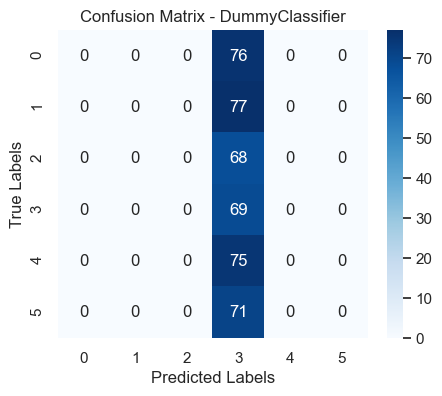

Model: LogisticRegression
Accuracy: 0.5711009174311926
Recall: 0.5711009174311926
Precision: 0.576124300902875
F1-Score: 0.5697566235970645


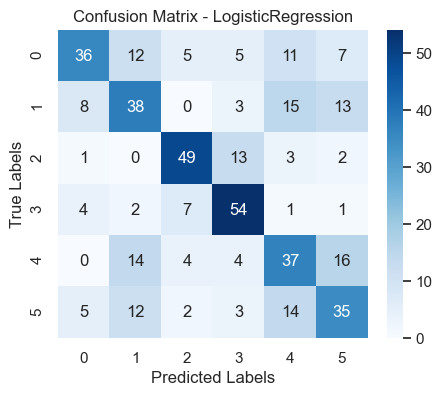

Model: GaussianNB
Accuracy: 0.36926605504587157
Recall: 0.36926605504587157
Precision: 0.4667601167841504
F1-Score: 0.35969959204186136


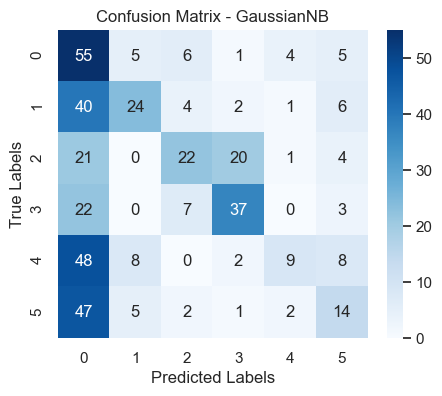

Model: KNeighborsClassifier
Accuracy: 0.5275229357798165
Recall: 0.5275229357798165
Precision: 0.5275749157638422
F1-Score: 0.5246805143445864


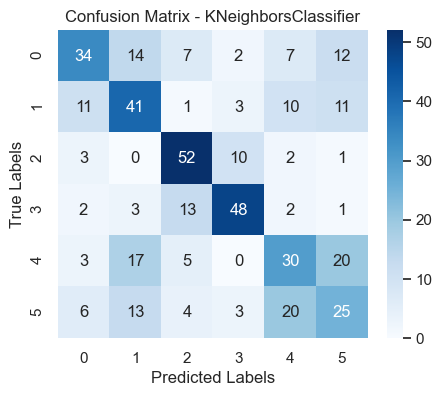

Model: GradientBoostingClassifier
Accuracy: 0.5688073394495413
Recall: 0.5688073394495413
Precision: 0.5714211483772326
F1-Score: 0.5669447936154425


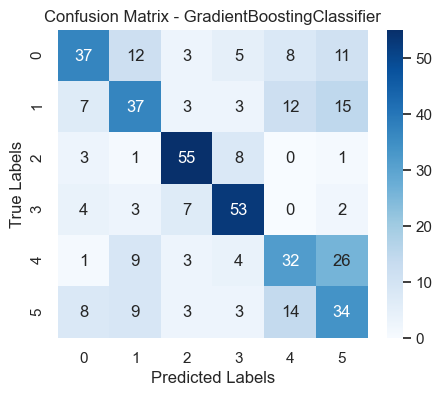

Model: AdaBoostClassifier
Accuracy: 0.4243119266055046
Recall: 0.4243119266055046
Precision: 0.4174151720243398
F1-Score: 0.41627207909231306


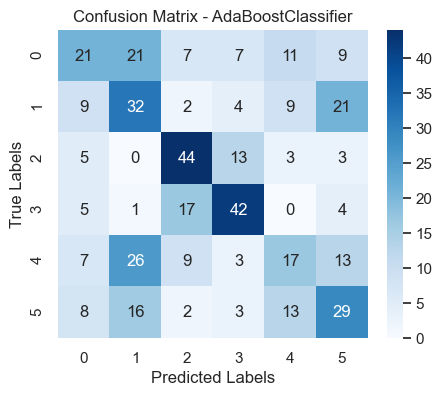

Model: DecisionTreeClassifier
Accuracy: 0.4380733944954128
Recall: 0.4380733944954128
Precision: 0.43659497567501054
F1-Score: 0.4357513505065838


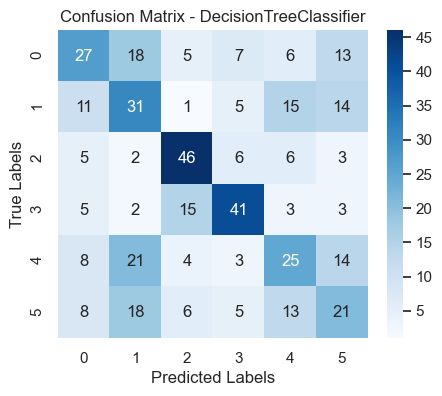

Model: RandomForestClassifier
Accuracy: 0.5619266055045872
Recall: 0.5619266055045872
Precision: 0.561485786658811
F1-Score: 0.557982839851985


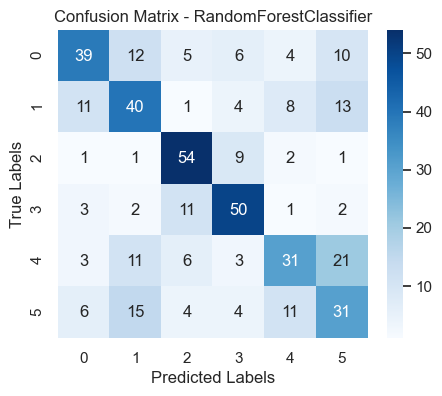

Model: SVC
Accuracy: 0.5665137614678899
Recall: 0.5665137614678899
Precision: 0.5938644551783926
F1-Score: 0.5635420868308192


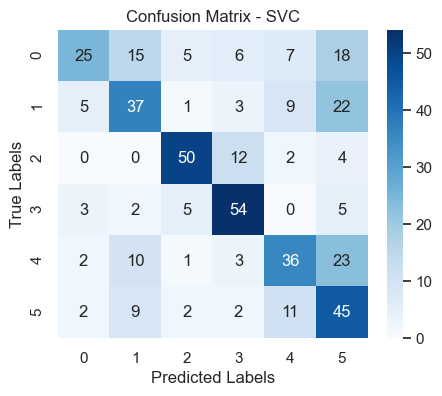

Model: CatBoostClassifier
Accuracy: 0.5665137614678899
Recall: 0.5665137614678899
Precision: 0.5661394741213154
F1-Score: 0.5635674864636309


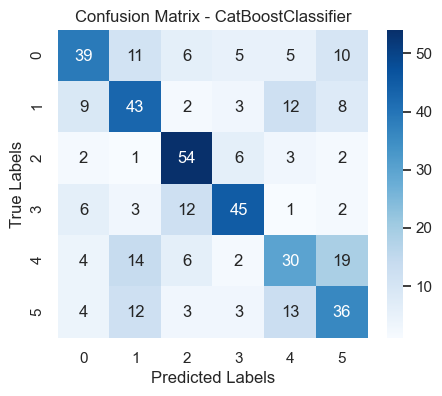

Model: LGBMClassifier
Accuracy: 0.5596330275229358
Recall: 0.5596330275229358
Precision: 0.561937782717439
F1-Score: 0.5577063041230179


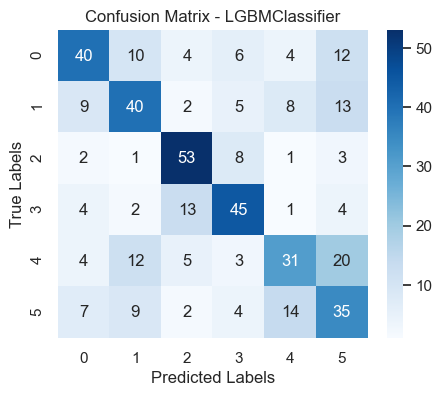

In [147]:
train_and_evaluate_models(df, models_to_evaluate, RANDOM_STATE=RANDOM_STATE)

Вывод по разделу:

Построены базовые модели без подбора гиперпараметров. Для каждой модели выведена матрица правильных попаданий и ошибок по классам (confusion matrix). В список моделей добавлена Dummy модель классификатора - как индикатор адекватности моделей. Перечень использованных моделей на этапе построения базовой модели:

* DummyClassifier(strategy='most_frequent'),
* LogisticRegression(solver='lbfgs', max_iter=100),   
* GaussianNB(),
* KNeighborsClassifier(n_neighbors=5),
* GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3),
* AdaBoostClassifier(n_estimators=50, learning_rate=1.0),
* DecisionTreeClassifier(max_depth=None, criterion='gini'),
* RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42),
* SVC(kernel='rbf', C=1.0, gamma='scale'),
* CatBoostClassifier(verbose=0, random_seed=RANDOM_STATE),
* LGBMClassifier(random_state=RANDOM_STATE)

## Шаг 4. Перебор моделей с подбором гиперпараметров

In [148]:
# Разделение выборки
X = df.drop(['district'], axis=1)
y = df['district']

#### Описание техники подбора гиперпараметров

В коде используется `RandomizedSearchCV` для подбора гиперпараметров. Этот метод осуществляет выборку заданного числа комбинаций параметров из указанных распределений (distribs) и выполняет кросс-валидацию для каждого набора. В качестве метрики для оценки лучших параметров используется '`accuracy`' (точность).

Стандартизация данных с помощью `StandardScaler` в каждом пайплайне важна, поскольку она обеспечивает равный вклад каждого признака в вычисления расстояний в моделях, чувствительных к масштабу данных, например, логистическая регрессия и метод ближайших соседей. Это шаг предварительной обработки, который преобразует данные так, чтобы их среднее значение было равно нулю, а стандартное отклонение — единице.

Для защиты от утечки данных в процессе обучения код использует кросс-валидацию внутри цикла `RandomizedSearchCV` (с параметром cv=5). Это обеспечивает, что модель никогда не тестируется на данных, которые она видела во время обучения, что могло бы привести к завышенной оценке эффективности.

Применение простой базовой модели (dummy model) полезно в качестве отправной точки для сравнения. Она использует простые правила, такие как 'most_frequent', 'stratified' или 'uniform', для прогнозирования. Это позволяет убедиться, что более сложные модели действительно извлекают закономерности из данных, а не просто работают так же или немного лучше, чем тривиальная модель.

In [149]:
# Словарь моделей и их гиперпараметров для перебора с включением стандартизации
models_and_distributions = {
    'Dummy': {
        'pipeline': Pipeline([
            ('scaler', StandardScaler()),
            ('model', DummyClassifier())
        ]),
        'distribs': {
            'model__strategy': ['stratified', 'most_frequent', 'uniform']
        }
    },
    'LogisticRegression': {
        'pipeline': Pipeline([
            ('scaler', StandardScaler()),
            ('model', LogisticRegression(max_iter=1000))
        ]),
        'distribs': {
            'model__C': [0.01, 0.1, 1, 10, 100],
            'model__solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag'],
            'model__penalty': ['l2'],
            'model__multi_class': ['ovr', 'multinomial'],
            'model__max_iter': [1000, 2000]
        }
    }
}

### Рандомный перебор гиперпараметров

In [150]:
# Список для хранения лучших моделей, параметров и метрик
best_estimators = []

# Перебор моделей и их гиперпараметров
for model_name, md in models_and_distributions.items():
    random_search = RandomizedSearchCV(md['pipeline'], md['distribs'], n_iter=10, cv=5, scoring='accuracy', random_state=42)
    random_search.fit(X, y)
    y_pred = random_search.predict(X)
    cm = confusion_matrix(y, y_pred)
    f1 = f1_score(y, y_pred, average='weighted')
    acc = accuracy_score(y, y_pred)
    prec = precision_score(y, y_pred, average='weighted')
    rec = recall_score(y, y_pred, average='weighted')
    best_estimators.append({
        'model_name': model_name,
        'best_score': random_search.best_score_,
        'best_params': random_search.best_params_,
        'confusion_matrix': cm,
        'f1_score': f1,
        'accuracy_score': acc,
        'precision_score': prec,
        'recall_score': rec
    })

# Вывод результатов
for estimator in best_estimators:
    print(f"Model: {estimator['model_name']}")
    print(f"Best CV score: {estimator['best_score']}")
    print(f"Best params: {estimator['best_params']}")
    print(f"Confusion Matrix:\n{estimator['confusion_matrix']}")
    print(f"F1 Score: {estimator['f1_score']}")
    print(f"Accuracy Score: {estimator['accuracy_score']}")
    print(f"Precision Score: {estimator['precision_score']}")
    print(f"Recall Score: {estimator['recall_score']}\n")

Model: Dummy
Best CV score: 0.17325213540018983
Best params: {'model__strategy': 'stratified'}
Confusion Matrix:
[[57 74 44 70 55 61]
 [53 61 55 71 64 61]
 [55 60 81 47 52 62]
 [60 65 59 54 68 57]
 [59 40 67 62 58 79]
 [69 50 49 76 55 66]]
F1 Score: 0.17330718604203194
Accuracy Score: 0.17325367647058823
Precision Score: 0.1734825325600809
Recall Score: 0.17325367647058823

Model: LogisticRegression
Best CV score: 0.48300326900769797
Best params: {'model__solver': 'lbfgs', 'model__penalty': 'l2', 'model__multi_class': 'ovr', 'model__max_iter': 1000, 'model__C': 0.1}
Confusion Matrix:
[[136  88  44  37  28  28]
 [ 51 195   4   8  71  36]
 [ 15  11 229  71  22   9]
 [ 17   4  38 299   2   3]
 [ 25  97  22  24 149  48]
 [ 44  89  19  27  91  95]]
F1 Score: 0.4955405175017731
Accuracy Score: 0.5068933823529411
Precision Score: 0.5001091695372193
Recall Score: 0.5068933823529411



### Перебор по сетке

In [151]:
# # Список для хранения лучших моделей, параметров и метрик
# best_estimators = []

# # Перебор моделей и их гиперпараметров
# for model_name, md in models_and_distributions.items():
#     grid_search = GridSearchCV(md['pipeline'], md['distribs'], cv=5, scoring='accuracy')
#     grid_search.fit(X, y)
#     y_pred = grid_search.predict(X)
#     cm = confusion_matrix(y, y_pred)
#     f1 = f1_score(y, y_pred, average='weighted')
#     acc = accuracy_score(y, y_pred)
#     prec = precision_score(y, y_pred, average='weighted')
#     rec = recall_score(y, y_pred, average='weighted')
#     best_estimators.append({
#         'model_name': model_name,
#         'best_score': grid_search.best_score_,
#         'best_params': grid_search.best_params_,
#         'confusion_matrix': cm,
#         'f1_score': f1,
#         'accuracy_score': acc,
#         'precision_score': prec,
#         'recall_score': rec
#     })

# # Вывод результатов
# for estimator in best_estimators:
#     print(f"Model: {estimator['model_name']}")
#     print(f"Best CV score: {estimator['best_score']}")
#     print(f"Best params: {estimator['best_params']}")
#     print(f"Confusion Matrix:\n{estimator['confusion_matrix']}")
#     print(f"F1 Score: {estimator['f1_score']}")
#     print(f"Accuracy Score: {estimator['accuracy_score']}")
#     print(f"Precision Score: {estimator['precision_score']}")
#     print(f"Recall Score: {estimator['recall_score']}\n")

#### Описание гиперпараметров

рассмотрим каждый гиперпараметр модели LogisticRegression в контексте мультиклассовой классификации:

* `C`:

Этот гиперпараметр контролирует обратную величину силы регуляризации. Меньшие значения соответствуют более сильной регуляризации. Регуляризация помогает предотвратить переобучение, штрафуя модель за слишком большие веса. В мультиклассовой классификации регуляризация может влиять на способность модели обобщать информацию по различным классам.

* `solver`:

Этот гиперпараметр указывает, какой алгоритм использовать для решения оптимизационной задачи. Для мультиклассовой классификации такие решатели, как 'newton-cg', 'lbfgs' и 'sag', могут обрабатывать мультиномиальную потерю, в то время как 'liblinear' ограничен схемой один-против-всех, если только не использовать 'auto', который автоматически выбирает решатель на основе данных.

* `penalty`:

Этот параметр указывает, какой нормы следует придерживаться при регуляризации. Чаще всего используется 'l2'-штраф, который подходит ко всем решателям, кроме 'liblinear', при использовании в мультиклассовой классификации. Он способствует созданию модели с лучшей обобщающей способностью, так как стимулирует меньшие, более разбросанные веса.

* `multi_class`:

Этот гиперпараметр определяет подход, используемый для решения задач мультиклассовой классификации. 'ovr' обозначает схему "один против всех", когда для каждого класса обучается отдельный бинарный классификатор. Другой вариант - 'multinomial', который рассматривает проблему как единую мультиномиальную задачу, что часто приводит к более точным оценкам вероятностей.

* `max_iter`:

Этот гиперпараметр указывает максимальное количество итераций, которые решатель выполняет для сходимости. В мультиклассовых задачах, где оптимизация проводится по большему числу классов и, возможно, по большему набору данных, важно иметь достаточное количество итераций, чтобы модель могла сойтись к хорошему решению.

Каждый из этих гиперпараметров можно настроить для оптимизации производительности модели логистической регрессии в задаче мультиклассовой классификации. Обычно используется поиск по сетке (grid search) или случайный поиск (randomized search) для экспериментирования с различными комбинациями этих гиперпараметров для нахождения наилучшей конфигурации модели.

#### Описание работы алгоритма классификации

Логистическая регрессия — это статистическая модель, используемая для прогнозирования вероятности наступления события путем применения логистической функции к линейной комбинации входных переменных.

Математическая формулировка:
Линейная комбинация входных переменных (предикторов): $z = w0 + w1*x1 + w2*x2 + ... + wn*xn$ где $w0$ — интерсепт (свободный член), $wi$ — веса модели, $xi$ — предикторы.

Логистическая функция (сигмоид): $\sigma(z) = \frac{1}{1 + e^{-z}}$ Эта функция преобразует линейную комбинацию в вероятность (от 0 до 1).

Алгоритм расчета модели:
Модель логистической регрессии обычно обучается методом максимального правдоподобия. Алгоритмы, такие как градиентный спуск или более продвинутые варианты (например, L-BFGS, Ньютона-Рафсона), используются для оптимизации логистической функции стоимости, которая измеряет разницу между предсказанными вероятностями и фактическими метками классов.

Предсказание:
После того как модель обучена (т.е., определены веса wi), предсказание вероятности того, что новый пример данных принадлежит положительному классу, происходит следующим образом:

Вычисляется линейная комбинация входных переменных для нового примера данных.
Полученное значение подается на вход логистической функции.
Результат логистической функции интерпретируется как вероятность наступления события (принадлежность к классу 1). Если вероятность больше заданного порога (например, 0.5), пример относят к классу 1, иначе — к классу 0.
Таким образом, логистическая регрессия предоставляет вероятностную оценку того, что пример данных принадлежит определенному классу, что делает ее мощным инструментом для классификационных задач.

## Шаг 5. Тест лучшей модели

In [152]:
# Разбиение на выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE, shuffle=True)

# Стандартизация
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Обучение
model = LogisticRegression(C=0.1, max_iter=1000, multi_class='ovr', penalty='l2', solver='newton-cg')
model.fit(X_train_scaled, y_train)

# Сбор предсказаний
y_pred = model.predict(X_test_scaled)

# Сбор вероятностей классов
y_pred_proba = model.predict_proba(X_test_scaled)

# Расчет метрик
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')  # Use an appropriate averaging method
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')  # Specify multi-class handling
cm = confusion_matrix(y_test, y_pred)


# Вывод
print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print('Confusion Matrix:')
print(cm)

Accuracy: 0.5115
F1 Score: 0.5052
ROC AUC: 0.8185
Confusion Matrix:
[[27 20  6  7  9  7]
 [11 46  1  4  9  6]
 [ 1  3 46 13  4  1]
 [ 5  1 11 51  1  0]
 [ 1 21  5  3 33 12]
 [ 8 18  2  5 18 20]]


In [153]:
# Создание DataFrame для коэффициентов модели для каждого класса
coefficients = model.coef_
intercepts = model.intercept_

# Подготовим имена столбцов, предполагая, что у нас есть список имен признаков features_names
# Если нет списка имен признаков, замените ['Feature 1', 'Feature 2', ..., 'Feature N'] на range(num_features)
feature_names = X.columns
coef_df = pd.DataFrame(coefficients, columns=feature_names)
coef_df['Intercept'] = intercepts

# Вывод коэффициентов в виде таблицы
print('Таблица коэффициентов модели для каждого класса:')
print(coef_df)



Таблица коэффициентов модели для каждого класса:
        so2       no2        o3        co      pm10     pm2_5  Intercept
0 -0.488600 -0.660034  0.121920  1.097027  0.252042 -0.489179  -1.841411
1 -1.145826  0.103123  0.423075 -0.073417 -0.017630  0.163854  -2.011985
2  1.281511  0.857598 -0.189629 -1.300357  0.009766 -0.277235  -2.208618
3  1.749629 -2.014778 -1.198260  0.291215  0.013841  0.104998  -2.621346
4 -0.697033  1.096590  0.491643  0.029977 -0.149066 -0.306046  -1.884592
5 -0.634106  0.413449  0.105638 -0.211389 -0.426977  0.682610  -1.765078


#### Интерпретация коэффициентов

Коэффициенты модели логистической регрессии отражают влияние единицы изменения признака на логарифм шансов принадлежности к определенному классу, при условии, что все остальные признаки остаются неизменными. Положительный коэффициент указывает на то, что с увеличением значения признака увеличивается вероятность принадлежности к классу, для которого этот коэффициент был вычислен. Отрицательный коэффициент говорит об обратном — с увеличением признака вероятность принадлежности к классу уменьшается. Величина коэффициента показывает силу влияния: чем больше абсолютное значение коэффициента, тем сильнее признак влияет на принадлежность к классу. Термин Intercept (свободный член) можно интерпретировать как логарифм шансов принадлежности к классу, когда значения всех признаков равны нулю.

## Шаг 6. Метамоделирование

In [154]:
# Разделение выборки
X = df.drop(['district'], axis=1)
y = df['district']

# Разбиение на выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE, shuffle=True)

In [155]:

# Рефакторинг базовых моделей для включения предварительной обработки и увеличения степени полиномиальных признаков
base_models = [
    ('knn', Pipeline([
        ('scaler', StandardScaler()),
        # ('poly', PolynomialFeatures()),  # Степень по умолчанию - 2
        # ('pca', PCA(n_components=2)),
        ('model', KNeighborsClassifier(n_neighbors=5))
    ])),
    ('rf', Pipeline([
        # ('scaler', StandardScaler()),
        ('poly', PolynomialFeatures(degree=3)),  # Увеличенная степень для Случайного леса
        # ('pca', PCA()),
        ('model', RandomForestClassifier(n_estimators=200, random_state=RANDOM_STATE))
    ])),
    ('svm', Pipeline([
        ('scaler', StandardScaler()),
        ('poly', PolynomialFeatures(degree=3)),  # Увеличенная степень для SVM
        # ('pca', PCA()),
        ('model', SVC(probability=True, random_state=RANDOM_STATE))
    ]))
]

# Мета-классификатор с multi_class, установленным в 'multinomial' для многоклассовой классификации
meta_classifier = LogisticRegression(multi_class='multinomial', random_state=RANDOM_STATE)

# Создание стекинг-классификатора
stacking_classifier = StackingClassifier(estimators=base_models, final_estimator=meta_classifier)

# Кросс-валидация модели
scores = cross_val_score(stacking_classifier, X_train, y_train, cv=5)  # 5-кратная кросс-валидация

# Вывод средней точности и стандартного отклонения
print(f'Средняя точность метамодели (кросс-валидация): {scores.mean():.2f} (+/- {scores.std():.2f})')

# Предсказание на тестовых данных с использованием кросс-валидации
y_pred = cross_val_predict(stacking_classifier, X_test, y_test, cv=5)

# Оценка точности
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность метамодели: {accuracy:.2f}')

# Подробный отчет по классификации
print('Отчет по классификации:')
print(classification_report(y_test, y_pred))

# Матрица ошибок
print('Матрица ошибок:')
conf_matrix = confusion_matrix(y_test, y_pred)

# Вывод матрицы ошибок
print(conf_matrix)

# Обучение стекинг-классификатора на полном наборе данных
stacking_classifier.fit(X_train, y_train)

# Предсказание на полном тестовом наборе данных
y_pred_full = stacking_classifier.predict(X_test)

# Оценка точности на полном тестовом наборе данных
accuracy_full = accuracy_score(y_test, y_pred_full)
print(f'Точность метамодели на полных данных: {accuracy_full:.2f}')

# Подробный отчет по классификации на полном тестовом наборе данных
print('Отчет по классификации на полных данных:')
print(classification_report(y_test, y_pred_full))

# Матрица ошибок на полном тестовом наборе данных
print('Матрица ошибок на полных данных:')
conf_matrix_full = confusion_matrix(y_test, y_pred_full)
print(conf_matrix_full)

Средняя точность метамодели (кросс-валидация): 0.57 (+/- 0.02)
Точность метамодели: 0.49
Отчет по классификации:
              precision    recall  f1-score   support

Eunpyeong-gu       0.49      0.43      0.46        76
  Gangbuk-gu       0.37      0.44      0.40        77
  Gangseo-gu       0.63      0.65      0.64        68
     Guro-gu       0.68      0.71      0.70        69
   Jongno-gu       0.41      0.45      0.43        75
     Mapo-gu       0.39      0.28      0.33        71

    accuracy                           0.49       436
   macro avg       0.49      0.49      0.49       436
weighted avg       0.49      0.49      0.49       436

Матрица ошибок:
[[33 16  5  3 14  5]
 [12 34  4  1 13 13]
 [ 3  2 44 14  2  3]
 [ 4  4 10 49  0  2]
 [ 9 19  3  2 34  8]
 [ 7 17  4  3 20 20]]
Точность метамодели на полных данных: 0.59
Отчет по классификации на полных данных:
              precision    recall  f1-score   support

Eunpyeong-gu       0.59      0.50      0.54        76
  Gangbu

In [156]:
# # Рефакторинг базовых моделей для включения предварительной обработки и увеличения степени полиномиальных признаков, где это уместно
# base_models = [
#     ('knn', Pipeline([
#         ('scaler', StandardScaler()),
#         # ('poly', PolynomialFeatures()),  # Степень по умолчанию - 2
#         # ('pca', PCA(n_components=2)),
#         ('model', KNeighborsClassifier(n_neighbors=5))
#     ])),
#     ('rf', Pipeline([
#         # ('scaler', StandardScaler()),
#         ('poly', PolynomialFeatures(degree=3)),  # Увеличенная степень для Случайного леса
#         # ('pca', PCA()),
#         ('model', RandomForestClassifier(n_estimators=200, random_state=RANDOM_STATE), )
#     ])),
#     ('svm', Pipeline([
#         ('scaler', StandardScaler()),
#         ('poly', PolynomialFeatures(degree=3)),  # Увеличенная степень для SVM
#         # ('pca', PCA()),
#         ('model', SVC(probability=True, random_state=RANDOM_STATE))
#     ]))
# ]

# # Мета-классификатор с multi_class, установленным в 'multinomial' для многоклассовой классификации
# meta_classifier = LogisticRegression(multi_class='multinomial', random_state=RANDOM_STATE)

# # Создание стекинг-классификатора
# stacking_classifier = StackingClassifier(estimators=base_models, final_estimator=meta_classifier)

# # Обучение стекинг-классификатора
# stacking_classifier.fit(X_train, y_train)

# # Предсказание на тестовых данных
# y_pred = stacking_classifier.predict(X_test)

# # Оценка точности
# accuracy = accuracy_score(y_test, y_pred)
# print(f'Точность метамодели: {accuracy:.2f}')

# # Подробный отчет по классификации
# print('Отчет по классификации:')
# print(classification_report(y_test, y_pred))

# # Матрица ошибок
# print('Матрица ошибок:')
# conf_matrix = confusion_matrix(y_test, y_pred)
# print(conf_matrix)

Вывод по разделу:

Создана метамодель, используя стекинг с тремя базовыми моделями (KNN, случайный лес и SVM) и мета-классификатором (логистическая регрессия). После обучения модели на обучающем наборе данных, код выводит точность метамодели на тестовом наборе, детальный отчет по классификации для каждого класса и матрицу ошибок, которая показывает количество правильно и неправильно классифицированных экземпляров.
Стекинг немного помог повысить точность предсказания, но этот метод требует отдельной настройки и подготовки базовых моделей. В нашем случае в предобработку для каждой базовой модели добавлены различные варианты. Например метод главных компонент или создание полиномиальных признаков разных степеней.

## Шаг 7 Связь районов

Проверьте предположение о том, что если станции наблюдения расположены относительно недалеко друг от друга, то они регистрируют в целом схожие характеристики загрязнения атмосферы

`Нулевая гипотеза (H0)`: Не существует статистически значимой линейной связи между расстоянием между станциями наблюдения и схожестью характеристик загрязнения атмосферы. То есть любая обнаруженная корреляция является результатом случайности.

`Альтернативная гипотеза (H1)`: Существует статистически значимая линейная связь между расстоянием между станциями наблюдения и схожестью характеристик загрязнения атмосферы.

In [157]:
### Обзорная карта района наблюдений
# Обзор станций мониторинга на карте

# Подготовка датасета
district_stations = stations[stations['Station_code'].isin(list(measures['Station_code'].unique()))]
district_stations['district'] = district_stations['Address'].str.split(',').str[2]
district_stations.drop('Address', axis=1, inplace=True)
district_stations.columns = district_stations.columns.str.lower()


# Вывод карты
stations_map = folium.Map(location=[37.562600,127.024612], tiles='cartodbpositron', zoom_start=11)

# Add points to the map
for idx, row in district_stations.iterrows():
    folium.Marker([row['latitude'], row['longitude']], popup=row[['district', 'station_code']]).add_to(stations_map)
    
# Adding borders
folium.GeoJson(
    district_borders,
    name='geojson'
).add_to(stations_map)

# Display the map
stations_map


In [158]:
# .loc для более явного присваивания при создании 'district_stations'.
district_stations = (
    stations.loc[stations['Station_code'].isin(measures['Station_code'].unique()), ['Address', 'Latitude', 'Longitude', 'Station_code']]
    .assign(district=lambda x: x['Address'].str.split(',').str[2])
    .drop('Address', axis=1)
    .rename(str.lower, axis='columns')
    .sort_values('district')
    .reset_index(drop=True)
)

# Предполагается, что 'df' определен ранее в коде и содержит необходимые столбцы.
# Если нет, убедитесь, что 'df' определен перед выполнением этого фрагмента.

# Используйте .assign для непосредственного создания 'lat' и 'long'.
atmosferic_means = (
    df.groupby("district")
    .mean()
    .reset_index()
    .sort_values(by='district')
    .assign(lat=district_stations['latitude'], long=district_stations['longitude'])
)

# Определите столбцы вне цикла для ясности.
columns = ['so2', 'no2', 'o3', 'co', 'pm10', 'pm2_5']

# Рассчитайте евклидовы расстояния с помощью pdist и squareform.
euclidean_distances = pd.DataFrame(
    distance.squareform(distance.pdist(atmosferic_means[columns], 'euclidean')),
    columns=atmosferic_means['district'],
    index=atmosferic_means['district']
)

# Векторизуйте расчет расстояния с помощью apply для повышения производительности.
def calculate_distances(row, df):
    return geodesic((row['lat'], row['long']), (df['lat'], df['long'])).kilometers

real_distances = atmosferic_means.apply(
    lambda row: atmosferic_means.apply(lambda x: calculate_distances(row, x) if row.name != x.name else 0, axis=1),
    axis=1
)
real_distances.columns = atmosferic_means['district']
real_distances.index = atmosferic_means['district']

# Объедините евклидовы и реальные расстояния в длинном формате с помощью pd.melt и pd.merge.
euclidean_long = euclidean_distances.reset_index().melt(id_vars='district', var_name='district2', value_name='Euclidean')
real_distances_long = real_distances.reset_index().melt(id_vars='district', var_name='district2', value_name='Real')

# Исключите расстояния от самого к себе и дубликаты, сравнив названия районов.
combined_distances_long = (
    pd.merge(euclidean_long, real_distances_long, on=['district', 'district2'])
    .query("district < district2")
    .reset_index(drop=True)
)

display(combined_distances_long)

,district,district2,Euclidean,Real
0,Eunpyeong-gu,Gangbuk-gu,5.236413,8.013305
1,Eunpyeong-gu,Gangseo-gu,1.422696,11.397215
2,Gangbuk-gu,Gangseo-gu,6.583400,19.370314
3,Eunpyeong-gu,Guro-gu,2.593815,12.984016
4,Gangbuk-gu,Guro-gu,7.673814,19.791782
5,Gangseo-gu,Guro-gu,1.869024,7.033720
6,Eunpyeong-gu,Jongno-gu,2.271188,7.483498
7,Gangbuk-gu,Jongno-gu,3.719441,8.447853
8,Gangseo-gu,Jongno-gu,3.648152,15.312466
9,Guro-gu,Jongno-gu,4.167466,13.055887


In [159]:
similarity_data = combined_distances_long['Euclidean']
distance_data = combined_distances_long['Real']
 
correlation, p_value = pearsonr(similarity_data, distance_data)
 
print(f"Коэффициент корреляции: {correlation}")
print(f"P-value: {p_value}")

# Сравниваем p-value с уровнем значимости
if p_value < ALPHA:
    print("Отклоняем нулевую гипотезу, результаты статистически значимы.")
else:
    print("Принимаем нулевую гипотезу, результаты не являются статистически значимыми.")

Коэффициент корреляции: 0.4836552976855788
P-value: 0.06775864774806167
Принимаем нулевую гипотезу, результаты не являются статистически значимыми.


`Нулевая гипотеза (H0)`: Не существует статистически значимой линейной связи между расстоянием между станциями наблюдения и схожестью характеристик загрязнения атмосферы. То есть любая обнаруженная корреляция является результатом случайности.

`Альтернативная гипотеза (H1)`: Существует статистически значимая линейная связь между расстоянием между станциями наблюдения и схожестью характеристик загрязнения атмосферы.

`Результаты`:

`Коэффициент корреляции (r)`: 0.4836552976855788
`P-value`: 0.06775864774806167
`Интерпретация`:

Коэффициент корреляции r = 0.48 указывает на наличие умеренной положительной связи между расстоянием между станциями и схожестью характеристик загрязнения. Однако полученное p-value превышает общепринятый порог статистической значимости α = 0.05, что не позволяет нам отклонить нулевую гипотезу.

Таким образом, на уровне значимости 5% мы не можем утверждать, что наблюдаемая корреляция между расположением станций и схожестью данных о загрязнении атмосферы является статистически значимой. Это не исключает возможности наличия связи, но для подтверждения такой связи требуются дополнительные данные или более мощное исследование.

## Шаг 8 Сезонность

Изменяется ли степень загрязнения атмосферы в зависимости от времени года, а если изменяется, то насколько существенно и в каких районах? Может ли качество модели быть улучшено, если ко входящим переменным добавить день или месяц наблюдения? Каким образом вы реализуете введение новой переменной в модель?

In [160]:
season_df = remove_outliers(splitted_df)

Original number of records: 2190
New number of records after removing outliers and NaNs: 2176
Absolute change in number of records: 14
Percentage change in number of records: 0.64%


In [161]:
season_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2176 entries, 0 to 2175
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   measurement_date  2176 non-null   datetime64[ns]
 1   station_code      2176 non-null   int64         
 2   country           2176 non-null   object        
 3   city              2176 non-null   object        
 4   street_address    2176 non-null   object        
 5   latitude          2176 non-null   float64       
 6   longitude         2176 non-null   float64       
 7   so2               2176 non-null   float64       
 8   no2               2176 non-null   float64       
 9   o3                2176 non-null   float64       
 10  co                2176 non-null   float64       
 11  pm10              2176 non-null   float64       
 12  pm2_5             2176 non-null   float64       
 13  district          2176 non-null   object        
dtypes: datetime64[ns](1), fl

Введение новых признаков

In [162]:
season_df['season'] = season_df['measurement_date'].dt.month.map({
    1: 'зима', 2: 'зима', 
    3: 'весна', 4: 'весна', 5: 'весна', 
    6: 'лето', 7: 'лето', 8: 'лето', 
    9: 'осень', 10: 'осень', 11: 'осень', 
    12: 'зима'})
season_df['month'] = season_df['measurement_date'].dt.month_name()
season_df.sample(n=3)

,measurement_date,station_code,country,city,street_address,latitude,longitude,so2,no2,o3,co,pm10,pm2_5,district,season,month
1505,2017-02-19,116,Republic of Korea,Seoul,71 Gangseo-ro 45da-gil,37.544640,126.835151,0.0060,0.0330,0.0235,0.50,45.0,25.0,Gangseo-gu,зима,February
539,2017-06-27,104,Republic of Korea,Seoul,215 Jinheung-ro,37.609823,126.934848,0.0025,0.0245,0.0415,0.40,31.0,19.5,Eunpyeong-gu,лето,June
1831,2017-01-19,117,Republic of Korea,Seoul,45 Gamasan-ro 27-gil,37.498498,126.889692,0.0080,0.0405,0.0035,0.95,110.0,74.5,Guro-gu,зима,January


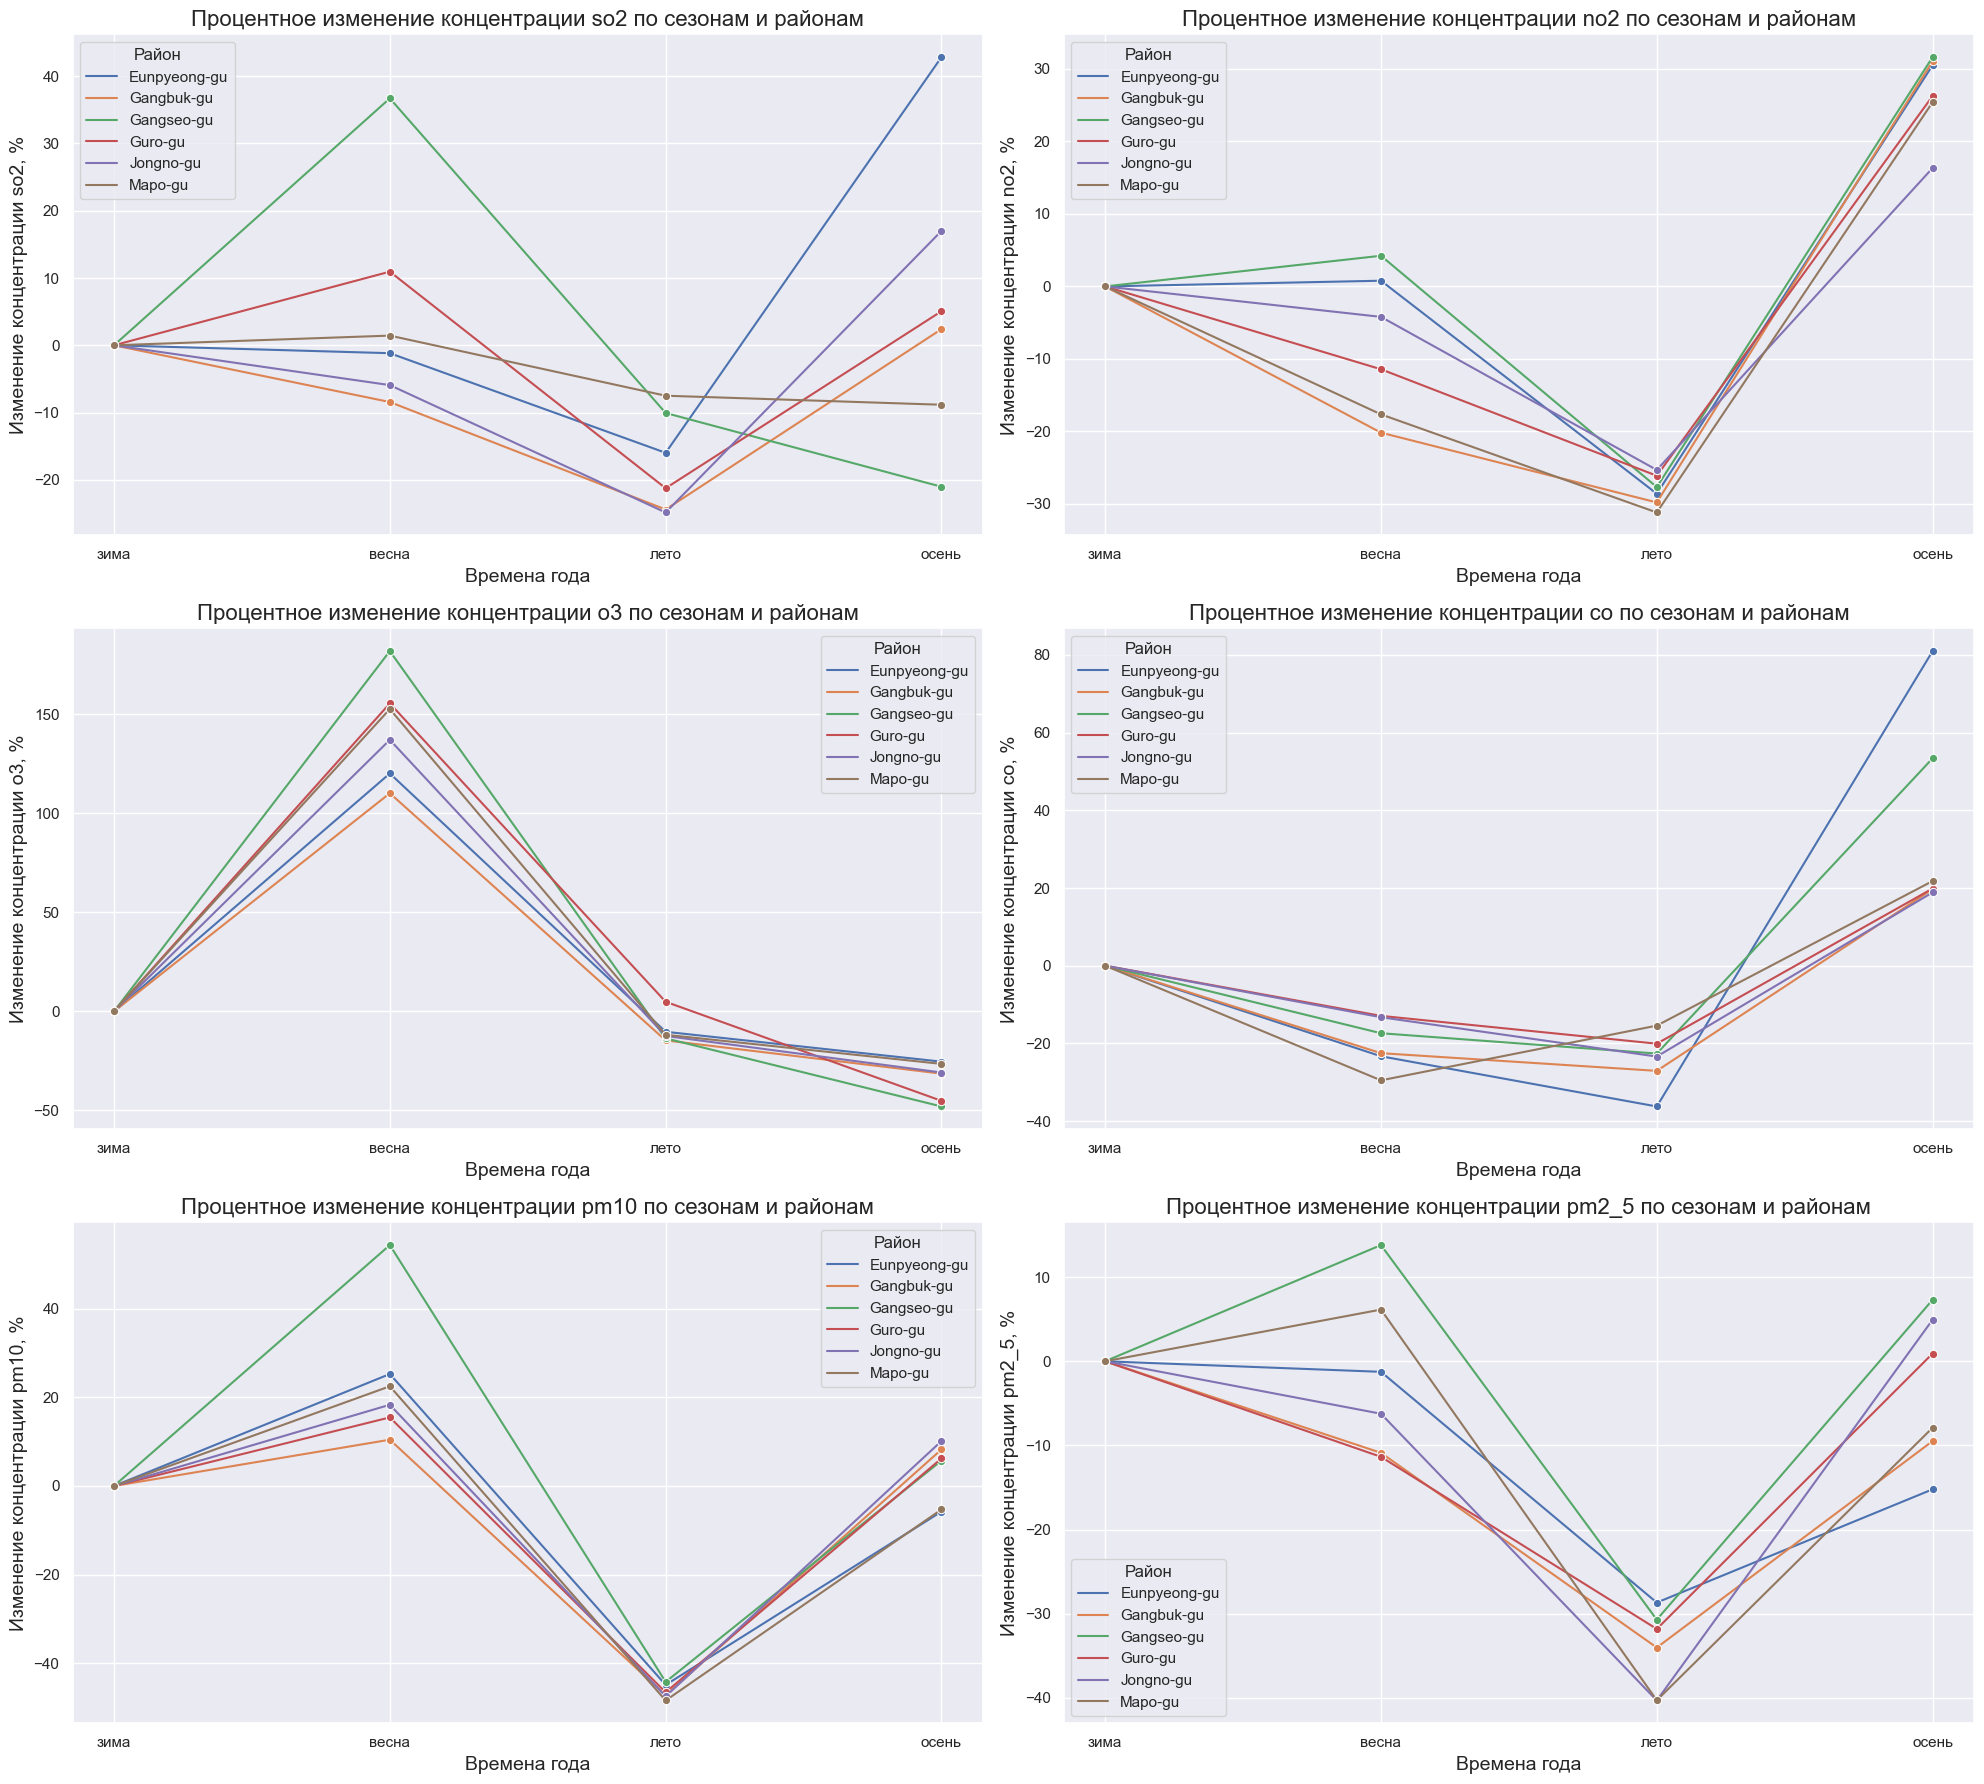

In [163]:
pollutants = list(X.columns)

# Определяем корректный порядок сезонов
season_order = ['зима', 'весна', 'лето', 'осень']

# Преобразуем столбец 'season' в категориальный тип с указанным порядком
season_df['season'] = pd.Categorical(season_df['season'], categories=season_order, ordered=True)

# Создаем словарь с функциями агрегации для каждого столбца с загрязнителями
aggregation_functions = {pollutant: 'mean' for pollutant in pollutants}

# Группируем данные по столбцу 'season' и 'district' и применяем функции агрегации
grouped_data = season_df.groupby(['season', 'district']).agg(aggregation_functions)

# Рассчитываем процентное изменение концентрации загрязнителей
percentage_change = grouped_data.groupby(level=1).pct_change().fillna(0) * 100

# Создаем одно поле для всех графиков
fig, axes = plt.subplots(3, 2, figsize=(20, 18))  # 3 строки, 2 столбца
axes = axes.flatten()  # Преобразуем массив осей в одномерный для удобства итерации

# Создаем графики для каждого загрязнителя
for i, pollutant in enumerate(pollutants):
    # Используем процентное изменение для построения графика
    sns.lineplot(data=percentage_change, x='season', y=pollutant, hue='district', marker='o', ax=axes[i])
    axes[i].set_xlabel('Времена года', fontsize=14)
    axes[i].set_ylabel(f'Изменение концентрации {pollutant}, %', fontsize=14)
    axes[i].set_title(f'Процентное изменение концентрации {pollutant} по сезонам и районам', fontsize=16)
    axes[i].legend(title='Район')

# Автоматически подгоняем расположение графиков
plt.tight_layout()
plt.show()

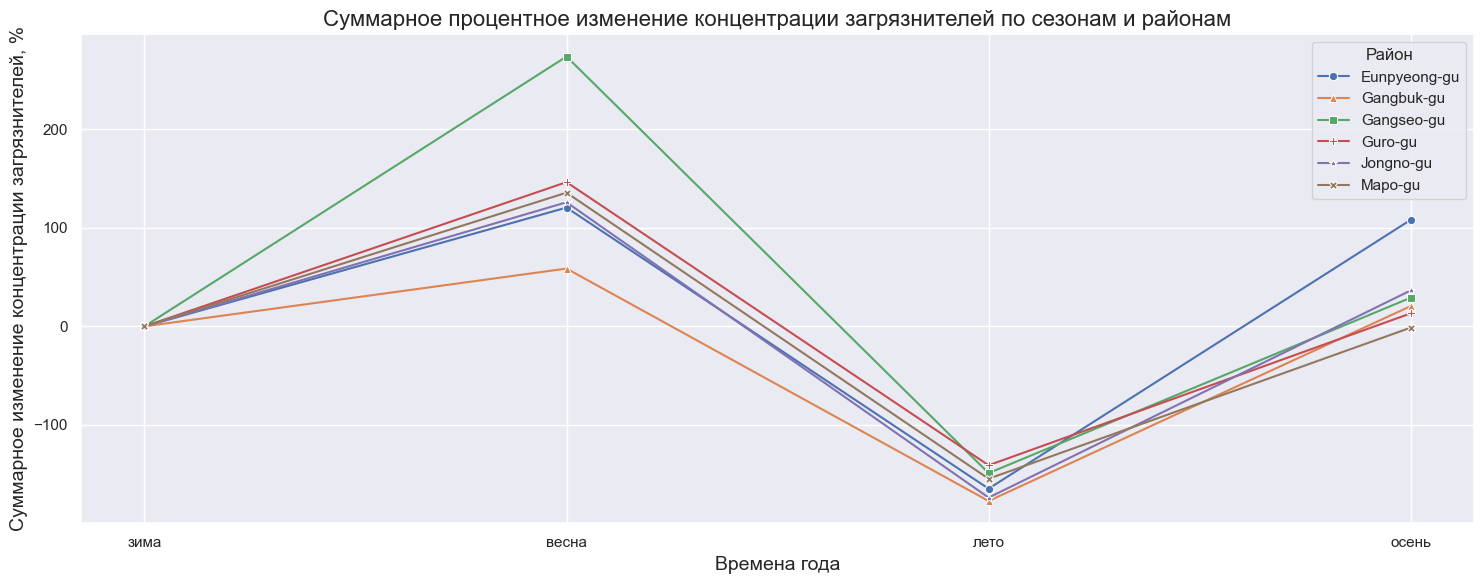

In [164]:
# Рассчитываем суммарное изменение концентрации загрязнителей для каждого района по сезонам
cumulative_change = percentage_change.sum(axis=1).reset_index(name='cumulative_change')

# Определяем маркеры
line_styles = ['-', '--', '-.', ':']
markers = ['o', '^', 's', 'P', '*', 'X']  # List of marker styles

# Убеждаемся что количество стилей соответсвует количеству районов
unique_districts = cumulative_change['district'].unique()
styles = [(line, marker) for line in line_styles for marker in markers]
if len(styles) < len(unique_districts):
    styles += styles[:len(unique_districts) - len(styles)]

# Раздаем маркеры районам
district_styles = dict(zip(unique_districts, styles))

# Итоговый плот
plt.figure(figsize=(15, 6))

# Построение графика для каждого района
for district in unique_districts:
    district_data = cumulative_change[cumulative_change['district'] == district]
    line_style, marker = district_styles[district]
    sns.lineplot(data=district_data, x='season', y='cumulative_change',
                 label=district, linestyle=line_style, marker=marker)

# Установки осей и заголовков
plt.xlabel('Времена года', fontsize=14)
plt.ylabel('Суммарное изменение концентрации загрязнителей, %', fontsize=14)
plt.title('Суммарное процентное изменение концентрации загрязнителей по сезонам и районам', fontsize=16)
plt.legend(title='Район')

# Вывод
plt.tight_layout()
plt.show()

Построение графика процентного изменения концентрации поллютантов по временам года позволяет отметить несколько закономерностей:
* не всегда изменения концентраций отдельных поллютантов коррелируют по времени года
* в целом видна выраженная сезонность по всем газам, кроме диоксида серы и районам
* изменения концентраций диоксида серы тоже подвержено сезонности, но паттерны для районов отличаются по сезонам
* наибольшим вариациям подвержен угарный газ и озон, при этом просматривается их обратная корреляция 

### Построение модели с данными о сезоне и месяце

In [165]:
# Код для подготовки данных

df2 = season_df.copy()
df2 = df2[['so2', 'no2', 'o3', 'co', 'pm10', 'pm2_5', 'district', 'season', 'month']]

# Разделение выборки
X = df2.drop(['district'], axis=1)
y = df2['district']

# Определение типов признаков
cat_feat = X.select_dtypes(include=['object', 'category']).columns.to_list()
num_feat = X.select_dtypes(exclude=['object', 'category']).columns.to_list()

# Разбиение на выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE, shuffle=True)

# Определение предварительной обработки для числовых признаков: масштабирование и полиномиальные признаки
num_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures())
])

# Определение предварительной обработки для категориальных признаков: one-hot кодирование
cat_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Объединение предварительной обработки для числовых и категориальных признаков
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_feat),
    ('cat', cat_pipeline, cat_feat)
])

# Определение базовых моделей с включением предварительной обработки
base_models = [
    ('knn', Pipeline([
        ('preprocessing', preprocessor),
        ('model', KNeighborsClassifier(n_neighbors=5))
    ])),
    ('rf', Pipeline([
        ('preprocessing', preprocessor),
        ('model', RandomForestClassifier(n_estimators=200, random_state=RANDOM_STATE))
    ])),
    ('svm', Pipeline([
        ('preprocessing', preprocessor),
        ('model', SVC(probability=True, random_state=RANDOM_STATE))
    ]))
]

# Мета-классификатор с multi_class, установленным в 'multinomial' для многоклассовой классификации
meta_classifier = LogisticRegression(multi_class='multinomial', random_state=RANDOM_STATE)

# Создание стекинг-классификатора
stacking_classifier = StackingClassifier(estimators=base_models, final_estimator=meta_classifier)

# Выполнение кросс-валидации
cv_results = cross_validate(stacking_classifier, X, y, cv=5, scoring='accuracy', return_train_score=True)

# Вывод результатов кросс-валидации
print(f'Cross-validation train scores: {cv_results["train_score"]}')
print(f'Cross-validation test scores: {cv_results["test_score"]}')

# Вывод средней точности и стандартного отклонения результатов кросс-валидации
print(f'Средняя точность на обучающей выборке: {np.mean(cv_results["train_score"]):.2f}')
print(f'Средняя точность на тестовой выборке: {np.mean(cv_results["test_score"]):.2f}')
print(f'Стандартное отклонение точности на тестовой выборке: {np.std(cv_results["test_score"]):.2f}')

# Дополнительно, если хотите обучить модель на полной обучающей выборке и оценить на тестовой выборке
stacking_classifier.fit(X_train, y_train)
y_pred = stacking_classifier.predict(X_test)

# Оценка точности
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность метамодели на тестовой выборке: {accuracy:.2f}')

# Подробный отчет по классификации
print('Отчет по классификации:')
print(classification_report(y_test, y_pred))

# Матрица ошибок
print('Матрица ошибок:')
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

Cross-validation train scores: [0.84655172 0.809305   0.72085009 0.77713957 0.79839173]
Cross-validation test scores: [0.43577982 0.53793103 0.54942529 0.51724138 0.4183908 ]
Средняя точность на обучающей выборке: 0.79
Средняя точность на тестовой выборке: 0.49
Стандартное отклонение точности на тестовой выборке: 0.05
Точность метамодели на тестовой выборке: 0.63
Отчет по классификации:
              precision    recall  f1-score   support

Eunpyeong-gu       0.64      0.54      0.59        76
  Gangbuk-gu       0.59      0.56      0.57        77
  Gangseo-gu       0.76      0.85      0.81        68
     Guro-gu       0.81      0.81      0.81        69
   Jongno-gu       0.52      0.48      0.50        75
     Mapo-gu       0.48      0.58      0.53        71

    accuracy                           0.63       436
   macro avg       0.63      0.64      0.63       436
weighted avg       0.63      0.63      0.63       436

Матрица ошибок:
[[41 12  4  4  5 10]
 [ 7 43  1  2 10 14]
 [ 0  0 5

### Построение модели с данными без данных о сезоне и месяце

In [166]:
# Код для подготовки данных

df2 = season_df.copy()
df2 = df2[['so2', 'no2', 'o3', 'co', 'pm10', 'pm2_5', 'district']]

# Разделение выборки
X = df2.drop(['district'], axis=1)
y = df2['district']

# Определение типов признаков
cat_feat = X.select_dtypes(include=['object', 'category']).columns.to_list()
num_feat = X.select_dtypes(exclude=['object', 'category']).columns.to_list()

# Разбиение на выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE, shuffle=True)

# Определение предварительной обработки для числовых признаков: масштабирование и полиномиальные признаки
num_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures())
])

# Определение предварительной обработки для категориальных признаков: one-hot кодирование
cat_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Объединение предварительной обработки для числовых и категориальных признаков
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_feat),
    ('cat', cat_pipeline, cat_feat)
])

# Определение базовых моделей с включением предварительной обработки
base_models = [
    ('knn', Pipeline([
        ('preprocessing', preprocessor),
        ('model', KNeighborsClassifier(n_neighbors=5))
    ])),
    ('rf', Pipeline([
        ('preprocessing', preprocessor),
        ('model', RandomForestClassifier(n_estimators=200, random_state=RANDOM_STATE))
    ])),
    ('svm', Pipeline([
        ('preprocessing', preprocessor),
        ('model', SVC(probability=True, random_state=RANDOM_STATE))
    ]))
]

# Мета-классификатор с multi_class, установленным в 'multinomial' для многоклассовой классификации
meta_classifier = LogisticRegression(multi_class='multinomial', random_state=RANDOM_STATE)

# Создание стекинг-классификатора
stacking_classifier = StackingClassifier(estimators=base_models, final_estimator=meta_classifier)

# Выполнение кросс-валидации
cv_results = cross_validate(stacking_classifier, X, y, cv=5, scoring='accuracy', return_train_score=True)

# Вывод результатов кросс-валидации
print(f'Cross-validation train scores: {cv_results["train_score"]}')
print(f'Cross-validation test scores: {cv_results["test_score"]}')

# Вывод средней точности и стандартного отклонения результатов кросс-валидации
print(f'Средняя точность на обучающей выборке: {np.mean(cv_results["train_score"]):.2f}')
print(f'Средняя точность на тестовой выборке: {np.mean(cv_results["test_score"]):.2f}')
print(f'Стандартное отклонение точности на тестовой выборке: {np.std(cv_results["test_score"]):.2f}')

# Дополнительно, если хотите обучить модель на полной обучающей выборке и оценить на тестовой выборке
stacking_classifier.fit(X_train, y_train)
y_pred = stacking_classifier.predict(X_test)

# Оценка точности
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность метамодели на тестовой выборке: {accuracy:.2f}')

# Подробный отчет по классификации
print('Отчет по классификации:')
print(classification_report(y_test, y_pred))

# Матрица ошибок
print('Матрица ошибок:')
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

Cross-validation train scores: [0.81091954 0.78920161 0.71797817 0.7501436  0.76680069]
Cross-validation test scores: [0.45183486 0.53103448 0.53333333 0.50114943 0.42758621]
Средняя точность на обучающей выборке: 0.77
Средняя точность на тестовой выборке: 0.49
Стандартное отклонение точности на тестовой выборке: 0.04
Точность метамодели на тестовой выборке: 0.60
Отчет по классификации:
              precision    recall  f1-score   support

Eunpyeong-gu       0.60      0.50      0.55        76
  Gangbuk-gu       0.52      0.49      0.51        77
  Gangseo-gu       0.76      0.78      0.77        68
     Guro-gu       0.72      0.77      0.74        69
   Jongno-gu       0.58      0.52      0.55        75
     Mapo-gu       0.46      0.58      0.51        71

    accuracy                           0.60       436
   macro avg       0.61      0.61      0.60       436
weighted avg       0.60      0.60      0.60       436

Матрица ошибок:
[[38 12  5  5  5 11]
 [10 38  1  3 10 15]
 [ 3  1 5

Вывод по разделу:
На метамодели с введениеми данных о сезоне и месяце удалось достигнуть повышения точности на тестовой выборке до 0,63 (было 0,6)

## Шаг 9. Общий вывод

В ходе работы над заданем были опробованы различные техники для создания моделей машинного обучения для предсказания района города по составу атмосферы по содержанию SO2, NO2, O3, CO, PM10 и PM2.5. 

Категориальные признаки кодируются методом one-hot encoding, в то время как числовые признаки нормализуются и возможно трансформируются с использованием полиномиальных признаков.

В качестве базовых моделей используются три различных алгоритма: метод ближайших соседей, случайный лес и машина опорных векторов. Эти базовые модели объединяются с помощью мета-классификатора, в данном случае это логистическая регрессия с мультиномиальным распределением. Эффективность ансамблевой модели оценивается с использованием кросс-валидации, и её производительность отражается в виде точности на обучающей и валидационной выборках.

Невозможность достижения высокой точности предсказаний может быть связана с рядом проблем:

Качество данных: В целом в анализе рассмотрен не большой датасет. Из него были убраны выбросы. Но в целом их репрезентативность нужно увеличивать за счет получения данных из доп источников.

Выбор признаков: Не смотря на коррелирующие признаки они не удалялись при обучении моделей. Более того их удаление это снижало точность.

Сложность модели: Для предсказаний строились быстрые и простые модели для ускорения процесса разработки.

Несбалансированность классов: В нашем случае классы таргета сбалансированы

Настройка гиперпараметров: Как было указано выше для увеличения точности можно отдельно и долго работать с перебором как самих моделей так и их гиперпараметров

Метод ансамблирования: Выбор базовых моделей и мета-классификатора может не быть идеальным для конкретной задачи. Это отдельное поле для исследований.